<a href="https://colab.research.google.com/github/IsWallison/Project_airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#### **Data Science na Prática 3.0**
*by [Wallison](https://www.linkedin.com/in/wallison-borges-48312516a/)*

---

# Análise dos Dados do Airbnb - *New Brunswick, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

A Startup fundada 10 anos atrás, conta com mais de 4 milhões de anfitriões, que já receberam mais de **1 bilhão de hóspedes** em quase todos os países, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade New Brunswick, Canada, e ver quais insights podem ser extraídos a partir de dados brutos.**

#New Brunswick, Canada

New Brunswick é uma região do leste do Canadá, tendo sua capital como Fredericton, a população total que habita suas fronteiras não chega a um milhão de habitantes, ficando próximo dos 780 mil, segundo o último censo do Canadá realizado no início deste ano (2019) pelo Statistics Canada.

Além de ser circundada pelo Atlântico, a província possui vários rios, florestas de pinheiros, montanhas e a famosa baía de Fundy, que é conhecida por suas marés extremas e pela presença frequente de baleias, o que pode ser uma ótima pedida para os aventureiros que desejam ver o animal de perto em seu habitat natural.

A maior cidade é Moncton, porém, o território possui cerca de 70 mil quilômetros quadrados. Destes, 80% é composto de florestas e somente 20% é habitado ou destinado à agricultura. Uma curiosidade é que New Brunswick é a única província oficialmente bilíngue do país,  com um percentual muito grande se sua população que fala inglês e francês.

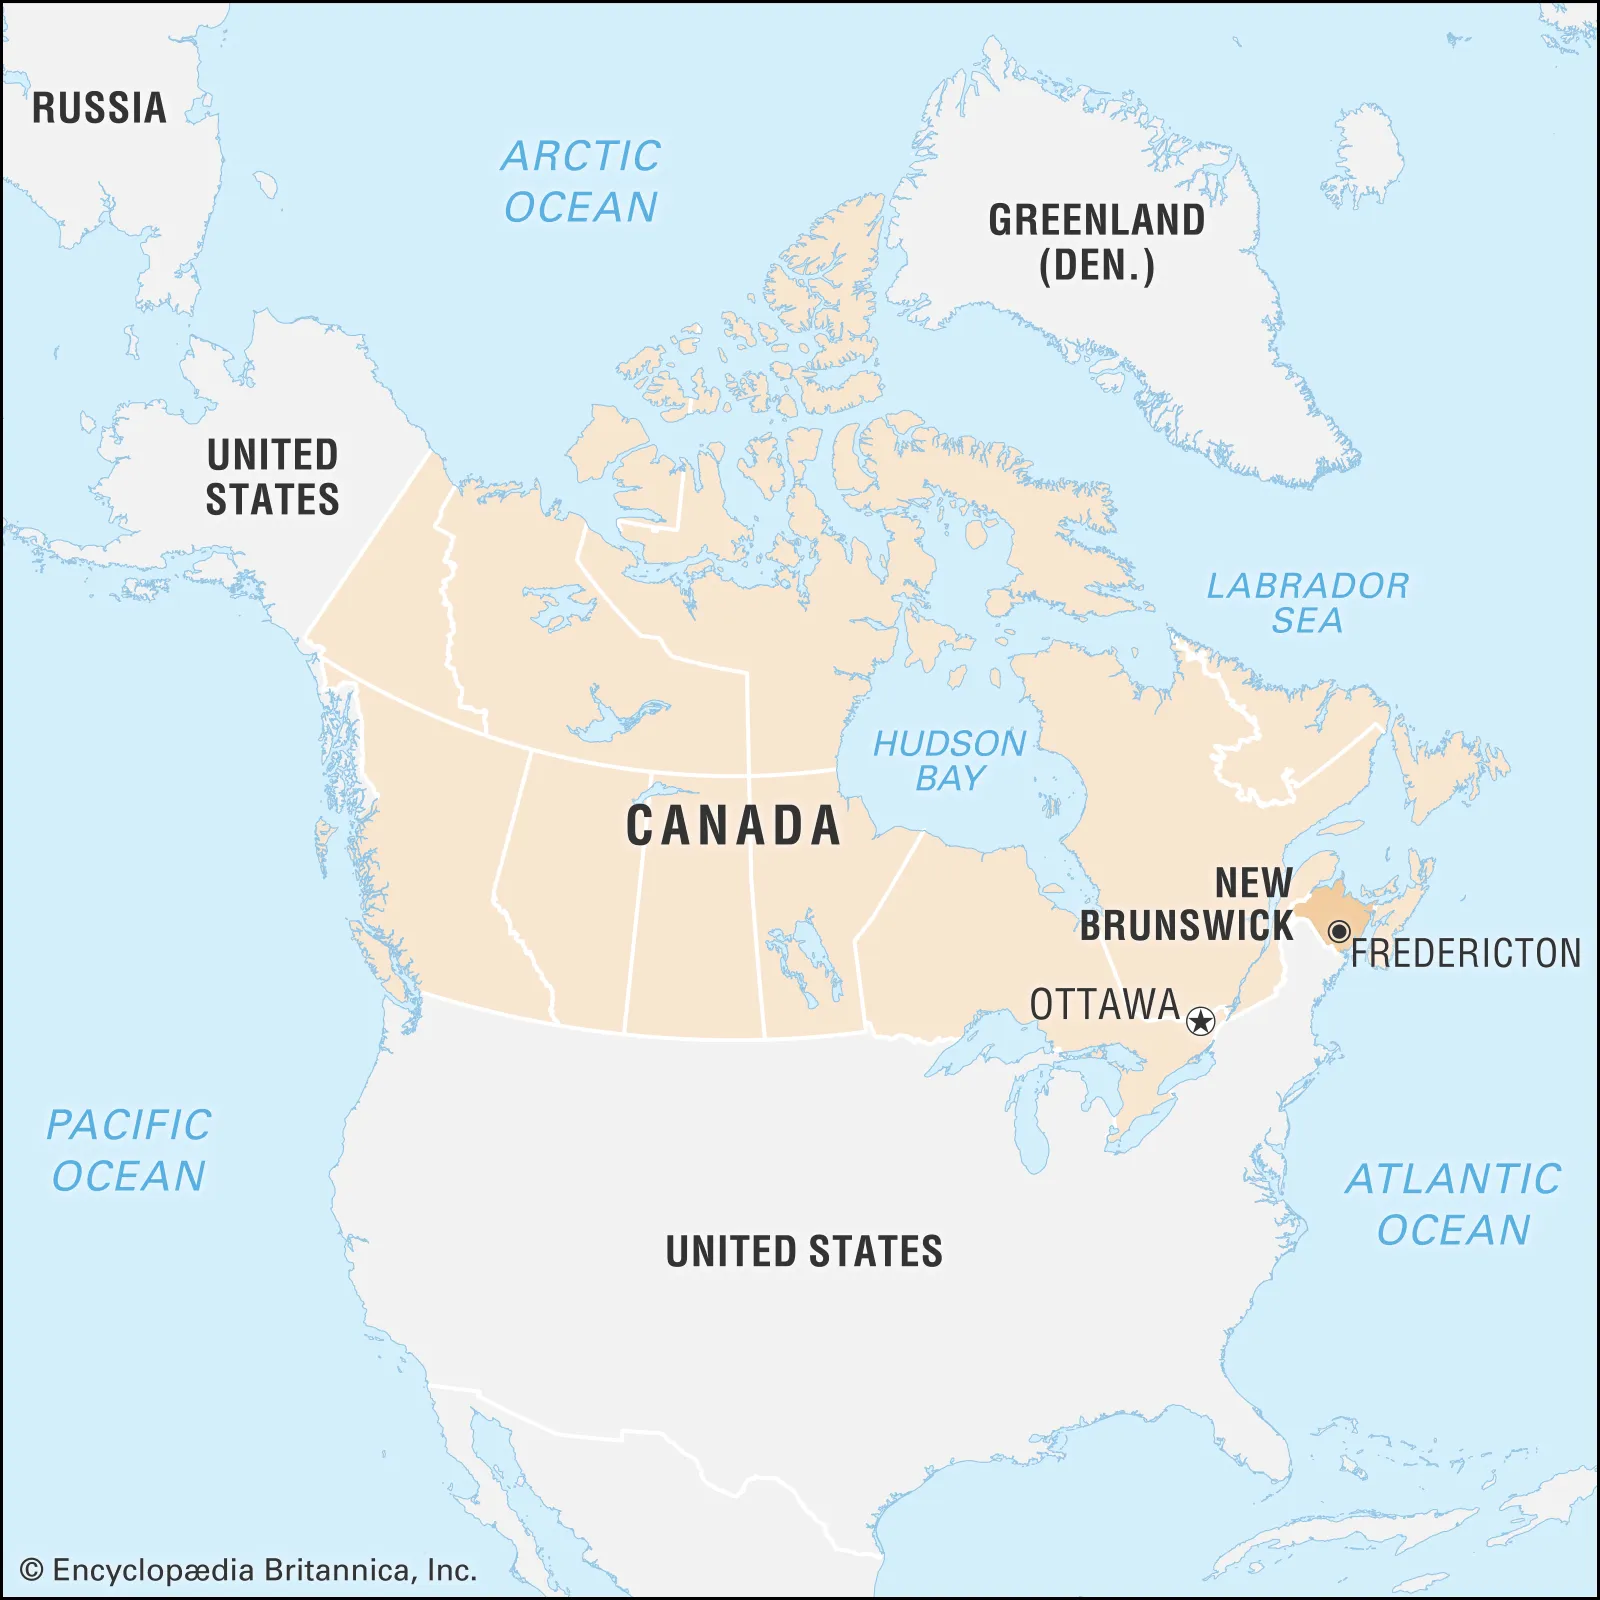

A revista Travel + Leisure classificou a New Brunswick entre os 50 lugares para se visitar em 2020.

## Obtenção dos Dados


Primeiramente para começarmos as análises, precisamos importar algumas biblioteca, que nos auxiliarão na análise e tratamento dos dados. **Panda, Matplotlib, Seaborm e Folium.**
 
**Pandas** é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar,
construído sobre a linguagem de programação Python.

**Matplotlib** é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas fáceis mais fáceis e as difíceis possíveis.

**Seaborn** é uma biblioteca de visualização de dados Python baseada em matplotlib. Ele fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.

**Folium** facilita a visualização de dados que foram manipulados em Python em um mapa de folheto interativo. Ele permite a vinculação de dados a um mapa para visualizações coropléticas, bem como a passagem de visualizações vetoriais/raster/HTML avançadas como marcadores no mapa.


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium 
from folium import plugins


%matplotlib inline

Importando os dados no site http://insideairbnb.com/get-the-data no formato CSV e atribuindo a uma variável chamada df.

CSV é a sigla para Comma Separated Values (em português, valores separados por vírgulas). Um arquivo CSV é um arquivo de texto simples que armazena informações de planilhas e tabelas. O conteúdo geralmente é uma tabela de texto, números ou datas. Os arquivos CSV podem ser facilmente importados e exportados usando programas que armazenam dados em tabelas.

In [2]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/canada/nb/new-brunswick/2022-09-22/visualisations/listings.csv')

## Análise dos Dados


Coletar todas as colunas para fazer um dicionário das variáveis para facilitar o entendimento da análise, através de um laço de repetição “for” que também são chamados de “loops definidos”, pois executam a instrução um certo número de vezes.

In [3]:
for coluna in df.columns:
  print(f'* {coluna} = ')

* id = 
* name = 
* host_id = 
* host_name = 
* neighbourhood_group = 
* neighbourhood = 
* latitude = 
* longitude = 
* room_type = 
* price = 
* minimum_nights = 
* number_of_reviews = 
* last_review = 
* reviews_per_month = 
* calculated_host_listings_count = 
* availability_365 = 
* number_of_reviews_ltm = 
* license = 


**Dicionário das variáveis**

* id = Identificador exclusivo do Airbnb para o anúncio.
* name = Nome da listagem.
* host_id = Identificador exclusivo do Airbnb para o anfitrião/usuário.
* host_name = Nome do anfitrião.
* neighbourhood_group = Condado.
* neighbourhood = vizinhança/bairro.
* latitude = Latitude.
* longitude = Longitude.
* room_type = tipo de hospedagem.
* price = preço diário na moeda local.
* minimum_nights = número mínimo de pernoites para o anúncio.
* number_of_reviews = O número de comentários que a listagem tem.
* last_review = A data da última/mais recente revisão.
* reviews_per_month = A média de comentários que a listagem tem por mês.
* calculated_host_listings_count = O número de listagens de casas/aptos inteiros que o host tem no scrape atual, na geografia da cidade/região.
* availability_365 = A disponibilidade do anúncio x dias no futuro.
* number_of_reviews_ltm = O número de comentários que a listagem tem (nos últimos 12 meses).
* license = O número da licença/autorização/registro.








Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,75065,Bay cottage on Passamaquoddy bay,397069,Bob,Charlotte,Saint Andrews,45.13241,-67.04725,Entire home/apt,256,2,40,2022-09-17,0.45,1,350,13,NaN
1,145013,Lobster Lane Cottage: private beach,642972,Jennifer,Kent,Dundas,46.32857,-64.52445,Entire home/apt,150,7,8,2020-08-23,0.08,1,297,0,NaN
2,261800,Furnished Executive Close to City,1373498,Usha,Saint John,City of Saint John,45.27727,-66.06040,Entire home/apt,125,2,59,2022-08-25,0.76,2,343,15,NaN
3,552500,Maine Riverfront Bed and Breakfast ROOM 3,2714886,Karen,Charlotte,Dufferin,45.16902,-67.24404,Private room,228,1,64,2022-08-18,0.52,4,90,5,NaN
4,872640,Acadian Isle Retreat - Heron Haven,2189998,Danielle,Gloucester,Shippagan,47.86785,-64.52187,Entire home/apt,135,7,3,2019-08-18,0.03,1,365,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Visualizando o formato e um resumo do *dataset*, para começar a análise exploratória


In [5]:
# identificar o volume de dados do DataFrame
print(f'O dataset tem {df.shape[0]} linhas e {df.shape[1]} colunas.')
print('\n Analisando a composição dos dados presente no Dataset \n')
df.info()

# verificar as 5 primeiras entradas do dataset


O dataset tem 3232 linhas e 18 colunas.

 Analisando a composição dos dados presente no Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3232 non-null   int64  
 1   name                            3232 non-null   object 
 2   host_id                         3232 non-null   int64  
 3   host_name                       3232 non-null   object 
 4   neighbourhood_group             3232 non-null   object 
 5   neighbourhood                   3232 non-null   object 
 6   latitude                        3232 non-null   float64
 7   longitude                       3232 non-null   float64
 8   room_type                       3232 non-null   object 
 9   price                           3232 non-null   int64  
 10  minimum_nights                  3232 non-null   int64  
 1

Verificando se o dataset tem algum valor duplicado.

In [6]:
df.duplicated().sum()

0

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Foram identificados alguns valores nulos/ausentes.

Para analisar a porcentagem de valores ausentes, vamos achar a quantidade total de valores ausentes e dividir pelo total de linhas, posteriormente multiplicar por 100 para achar o valor em porcentagem e a ordem será colocada do maior para a menor.

In [7]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
numero_de_linhas = df.shape[0]
((df.isnull().sum()/numero_de_linhas)*100).sort_values(ascending=False)

license                           99.938119
reviews_per_month                  9.313119
last_review                        9.313119
name                               0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_name                          0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

Temos dados ausente em 3 colunas: license, reviews_per_month e last_review, onde a license esta ausente em mais de 99% dos dados.
Pode significar várias coisas diferentes. Talvez o campo não fosse aplicável, ou os dados não estavam disponíveis. Pode ser que a pessoa que inseriu os dados não sabia o valor certo, ou não se preocupou que um campo não fosse preenchido.



### **Q3. Qual o tipo de distribuição das variáveis?** 

Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre.
Um histograma tornará fácil ver onde a maioria dos valores se classificam em uma escala de medição e quanta variação existe entre eles. 


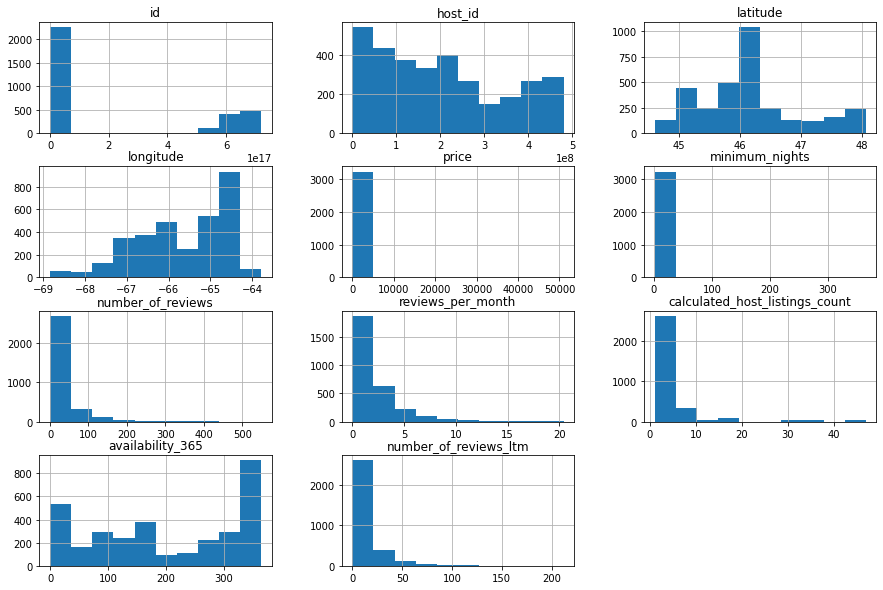

In [8]:
# plotar o histograma das variáveis numéricas
df.hist(figsize = (15,10));

Olhando esse histograma, o gráfico 'price' possui uma amplitude de valores muito grande, mas a maioria dos valores então agrupados em menos de 10000, oque acende um alerta em relação a valores *outliers*. Será necessária uma análise mais detalhada para confirmar.

Com uma descrição dos valores teremos acesso à contagem, média, padrão, mínimo, máximo, bem como percentis inferior, 50 e superior. Por padrão, o percentil inferior é 25 e o percentil superior é 75. O percentil 50 é igual à mediana.

In [9]:
df[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,3232.0,3232.0,3232.0,2931.0,3232.0
mean,182.1,2.8,31.2,2.2,201.1
std,904.8,7.9,48.8,2.3,130.5
min,13.0,1.0,0.0,0.0,0.0
25%,100.0,1.0,4.0,0.6,85.0
50%,143.5,2.0,14.0,1.4,184.0
75%,200.0,3.0,36.2,2.9,337.2
max,51000.0,365.0,550.0,20.4,365.0


Ficou visível a presença de valores atípicos ou outliers, que são valores muito acima da média, que podem implicar, tipicamente, em prejuízos à interpretação dos resultados dos testes estatísticos aplicados às amostras. Sendo necessário verificar se são valores reais ou algum tipo de erro que serão provavelmente descartados.

### **Q4. Qual a média dos preços de aluguel?**

Começando a analise selecionando apenas a coluna 'price', podemos facilmente descobrir a média de preço das hospedagens.

A média é calculada somando-se todos os valores de um conjunto de dados e dividindo-se pelo número de elementos deste conjunto.

In [10]:
# ver a média da coluna `price``
media_preço_full = df['price'].mean()
print(f"A média de preço das hospendagens com todos os valore são: {media_preço_full:.2f}$")

A média de preço das hospendagens com todos os valore são: 182.08$


Isso significa que a média de preço de hospedagem utilizando todos os valores, incluindo os outliers na região de New Brunswick, Canada é de aproximadamente 182.

Agora irmemos analisar os valores atípicos.


In [11]:
tamanho_total = len(df['price'])
tamanho_outliers = len(df[df['price']>650])
print(f"Valor Médio = {media_preço_full:.2f}$")
print(f"Valor Máximo = {df['price'].max()}$")
print(f"Valor mínimo = {df['price'].min()}$")
print(f'Relação entre total do dataset e os valores maiores que 650$ é: {tamanho_total} x {tamanho_outliers} ')
print(f'que equivalem a {tamanho_outliers/df.shape[0]*100:.2f}% do valores')



Valor Médio = 182.08$
Valor Máximo = 51000$
Valor Minimo = 13$
Relação entre total do dataset e os valores maiores que 650$ é: 3232 x 31 
que equivalem a 0.96% do valores


Como temos alguns valores atípicos, foi decidido não considerar alguns valores como, por exemplo, um anúncio custando 51000 por noite. 31 anúncios foram descartados, que representam 0,96% do dataset, esses valores são todos os valores superiores a 650 e apresentam um grande afastamento das demais da série.

Criando outro dataset sem os valores atípicos.



In [12]:
#df_padrao = df.drop(df[(df['price']>650) & (df['number_of_reviews']<2)].index)
#df_padrao.hist(figsize=(15,10));
df_padrao = df.drop(df[df['price']>650].index).copy()

Comparando a média usando todos os valores e a média sem os valores atípicos.


In [13]:
media_sem_outliers = df_padrao['price'].mean()
print('Sem os valores atípicos:')
print(f"Valor Médio = {media_sem_outliers:.2f}$")
print(f"Valor Máximo = {df_padrao['price'].max()}$")
print(f"Valor mínimo = {df_padrao['price'].min()}$")
diferenca = ((media_preço_full)-(media_sem_outliers))*100/media_preço_full
print(f'Diferença de {diferenca:.2f}% no valor médio')


Sem os valores atípicos:
Valor Médio = 157.72$
Valor Máximo = 640$
Valor Minimo = 13$
Diferença de 13.38% no valor médio


O Valor Médio como todo os dados foi aproximadamente 182 e o valor médio sem os valores atípicos foi de aproximadamente 158, uma diferença de cerca de 24$ ou 13%.


### **Q4. Qual a correlação existente entre as variáveis**

Uma matriz de correlação é uma tabela que indica os coeficientes de conexão entre os fatores. Cada célula da tabela mostra a conexão entre os dois fatores. A correlação é um número que varia entre -1 e 1. Em estatística é representado pela letra r. Uma correlação pode ser positiva(r > 0), o que significa que ambas as variáveis se movem na mesma direção ou são negativas(r < 0), o que significa que se movem em direções opostas, ou seja, quando o valor de uma variável aumenta, o valor da outra variáveis diminui. A correlação também pode ser nula ou zero, o que significa que as variáveis não estão relacionadas.


* Correlação positiva: ambas as variáveis mudam na mesma direção.
* Correlação Nula: Nenhuma relação na mudança das variáveis
* Correlação Negativa: as variáveis mudam em direções opostas.

In [14]:
# criar uma matriz de correlação
corr=df_padrao[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr().round(2)

# mostrar a matriz de correlação
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.00,0.05,-0.12,-0.12,-0.12,0.07
minimum_nights,0.05,1.00,-0.06,-0.16,-0.06,-0.02
number_of_reviews,-0.12,-0.06,1.00,0.33,-0.08,0.02
reviews_per_month,-0.12,-0.16,0.33,1.00,-0.09,0.08
calculated_host_listings_count,-0.12,-0.06,-0.08,-0.09,1.00,-0.08
availability_365,0.07,-0.02,0.02,0.08,-0.08,1.00


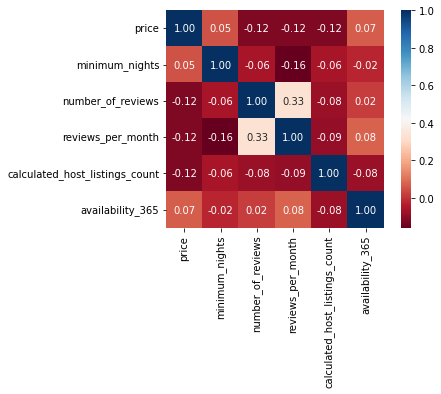

In [15]:
# plotar um heatmap a partir das correlações
#sns.heatmap(corr,fmt='.2f', square=True,linecolor='white', annot=True);
sns.heatmap(corr, cmap = 'RdBu', fmt='.2f', square = True , linecolor='white', annot= True);

Em geral, não foi encontrada correlação significativa entre o preço e as demais variáveis.

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Para acharmos o tipo de imóvel mais alugado, podemos simplesmente identificar qual valor mais se repete na coluna "room_type". Primeiramente vamos ver quanto temos de cada imóvel e depois analisar quanto isso representa em porcentagem.




In [16]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_padrao['room_type'].value_counts()

Entire home/apt    2544
Private room        651
Hotel room            4
Shared room           2
Name: room_type, dtype: int64

Para achar a porcentagem de cada tipo de imóvel, vamos dividir a soma da quantidade de cada imóvel pelo total de imóveis e depois multiplicar por 100.

Por exemplo, Entire home/apt tem 2544, ficaria (2544/3200)*100 = 79.5%

In [17]:
# mostrar a porcentagem de cada tipo de imóvel disponível

imoveis = dict(df_padrao['room_type'].value_counts()/df_padrao.shape[0]*100)
for v,k in imoveis.items():
  print(f'{k:.2f}% dos imóveis são do tipo {v}')


79.48% dos imóveis são do tipo Entire home/apt
20.34% dos imóveis são do tipo Private room
0.12% dos imóveis são do tipo Hotel room
0.06% dos imóveis são do tipo Shared room


### **Q6. Qual a localidade mais cara do dataset?**



Para acharmos a localidade com a média de aluguel mais cara, vamos juntar(agrupar) nosso dataset por localidade, depois vamos tirar a média de preço de cada localidade. A região que tiver o maior valor, será teoricamente a região mais cara.

In [18]:
# ver preços por bairros, na média
a = df_padrao.groupby(df_padrao['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]
#case2 = df.groupby(df['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]
for city,prices in a.items():
  print(f'{city}    \t{prices:.2f}$ ')

Saint-Andre    	400.00$ 
Dufferin    	305.40$ 
North Lake    	281.29$ 
Kars    	256.67$ 
Hardwicke    	234.89$ 
Musquash    	233.33$ 
Saint David    	228.14$ 
Weldford    	226.58$ 
Campobello    	225.56$ 
West Isles    	224.22$ 


A região de Saint-Andre aparece como a região mais cara, mas isso pode não ser realmente verdade, uma vez que a região só apresenta um único registro, como poder ser visto logo abaixo.


In [19]:
df_padrao[df_padrao['neighbourhood']=='Saint-Andre']

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
2709,641473311101080773,"MOTEL LEO, Grand Falls, NB, Canada.",107908941,Vj,Madawaska,Saint-Andre,47.069937,-67.785651,Private room,400,3,2,2022-08-21,1.09,1,364,2,NaN


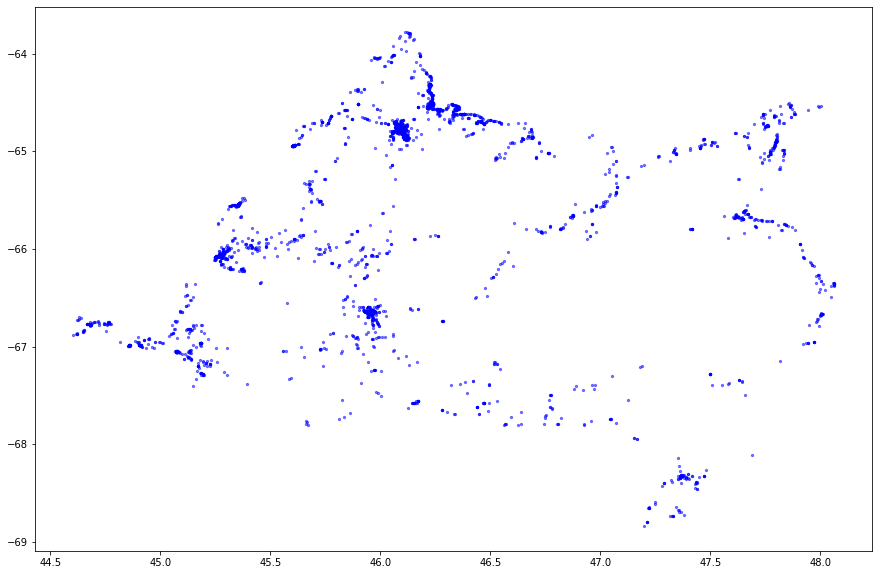

In [20]:
# plotar os imóveis pela latitude-longitude
plt.figure(figsize=(15,10))
plt.scatter(df_padrao['latitude'].values,df_padrao['longitude'].values, s=5,c='blue',alpha=0.5,zorder=5);


A partir dos dados de latitude e longitude presentes no dataset é possível visualizar um mapa de calor dos imóveis 


In [21]:


coordenadas=[]
for lat,lng in zip(df_padrao['latitude'].values, df_padrao['longitude'].values):
  coordenadas.append([lat,lng])


mapa = folium.Map(
    location=[46.10555,	-64.81432],
    zoom_start=5.5,
    min_zoom = 4
    
)
#git não abre o mapa folium, então tive de colocar uma imagem, se remover os "#"(Hashtag) das linhas abaixo é possivel utilizar o mapa interativo.
#mapa.add_child(plugins.HeatMap(coordenadas, min_opacity=0.1, blur=5))
#mapa

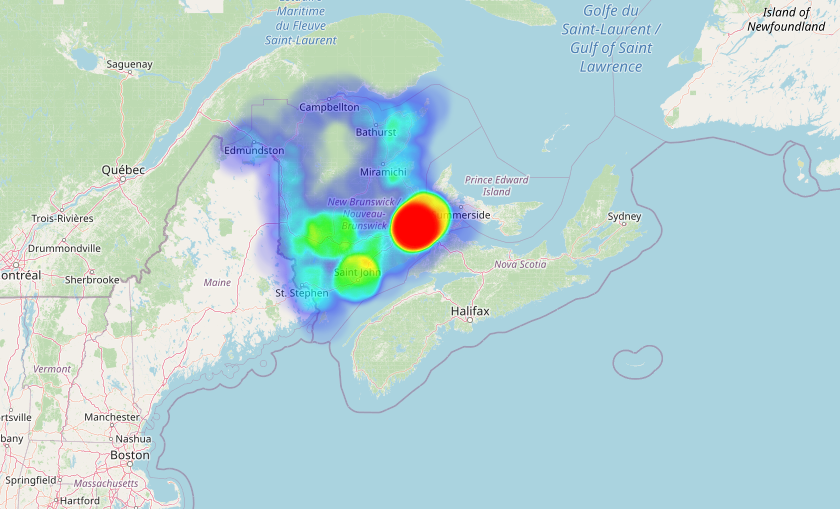

Descobrindo o valor das regiões que mais possuem anúncios.

In [22]:
df_padrao['neighbourhood'].value_counts()[:6]

Moncton               476
Shediac               299
City of Saint John    261
Fredericton           194
Dundas                115
Grand Manan            69
Name: neighbourhood, dtype: int64

Observando o mapa de calor, fica evidente que a maioria das hospedagens se localizam na região sul/sudeste de New Brunswick, principalmente na região sudeste.

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Como foi feito anteriormente, para acharmos a média vamos selecionar apenas a desejada, coluna 'minimum_nights', podemos facilmente descobrir a média de preço das hospedagens somando-se todos os valores e dividindo-se pelo número de elementos deste conjunto.

In [23]:
# ver a média da coluna `minimum_nights``
print('Sem os valores atípicos:')
print(f"Valor Máximo do mínimo de noites para aluguel = {df_padrao['minimum_nights'].max()}")
print(f"Valor mínimo do mínimo de noites para aluguel = {df_padrao['minimum_nights'].min()}")
print(f"A média do mínimo de noites para alugar é {df_padrao['minimum_nights'].mean():.1f}")


Sem os valores atípicos:
Valor Máximo do mínimo de noites para aluguel = 365
Valor Minimo do mínimo de noites para aluguel = 1
A média do minimo de noites para alugar é 2.8


Vamos analisar quanto anúncios utilizam 365 dias como o mínimo de noites para alugar, esse numero provavelmente é um outlier, uma vez que a média é 2,8. Se for confirmando, esse registro não será considerado.

Primeiramente vamos descobrir quantos anúncios possuem 365 dias como quantidade minima de dias. Para ajudar na visualização vou ordenar do maior índex para o menor, sendo o primeiro índex o desejado.

In [24]:
#df['minimum_nights'].value_counts().sort_values(ascending=True)[:10]
df_padrao['minimum_nights'].value_counts().sort_index(ascending=False)

365       1
90        4
80        1
60        2
31        2
30       12
28        4
22        1
21        3
14       10
13        1
12        1
11        1
10        3
7       208
6        48
5       102
4       128
3       395
2       963
1      1311
Name: minimum_nights, dtype: int64

In [25]:
tot_night =len(df_padrao['minimum_nights'])
min_night = len(df_padrao[df_padrao['minimum_nights']>30])
print(f'temos {min_night} valores maiores que 30 dias.')
calculo = min_night* 100 / tot_night
print(f'{min_night}*100/{tot_night} = {calculo}%')

temos 10 valores maiores que 30 dias.
10*100/3201 = 0.31240237425804435%


Temos 10 valores maiores que 30, que serão desconsiderados por se tratarem de outliers, que representam 0,31% do dataset. O valor máximo do mínimo de noites agora passará a ser 30 dias.

In [26]:
df_padrao=df_padrao.drop(df_padrao[df_padrao['minimum_nights']>30].index)
print(f"Valor Máximo do mínimo de noites para aluguel = {df_padrao['minimum_nights'].max()}")
print(f"A média do mínimo de noites para alugar é {df_padrao['minimum_nights'].mean():.1f}")

Valor Máximo do mínimo de noites para aluguel = 30
A média do minimo de noites para alugar é 2.5


Uso do boxplot para visualizar o mínimo de noites.

Boxplot, também conhecido como diagrama de caixa, é um tipo de gráfico para ilustrar um conjunto de dados. Por meio dele é possível fazer uma relação entre uma variável quantitativa (numérica) e outra qualitativa (categórica). 

O objetivo da construção desse gráfico é tornar mais nítida a visualização das estatísticas para fazer análises e/ou processamentos em relação a dispersão, assimetria, média, outliers (mínimos e máximos) e mediana

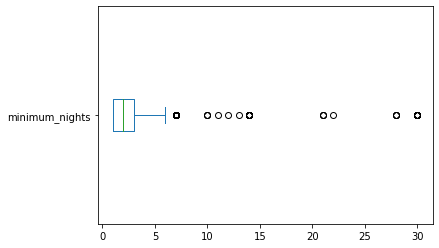

In [27]:
#df_padrao['minimum_nights'].plot(figsize=(15,5))
df_padrao['minimum_nights'].plot.box(vert=False);

## Conclusões


Neste caderno, foi feita uma análise superficial dos dados do airbnb da região de New Brunswick, Canada, tendo o banco de dados sido obtido do Airbnb no mês de novembro de 2022. Para aprimorar a análise, alguns outliers identificados por meio da visualização de histogramas de dados foram eliminados. Finalmente,
deve-se notar que esta análise, assim como o conjunto de dados utilizado, é uma versão resumida, com um número limitado de atributos.
A falta de uma base de dados grande em alguma regiões dificultar e/ou pode distorcer algumas conclusões.

Análise do dataset:
* linha: 3232   
* colunas: 18

Remoção de outliers:
* preço
* noites minimas

Preço médio da hospedagem:
* Valor Médio = 157.72$

O tipo de imóvel mais alugado no Airbnb, depois de remover os outliers:
Quantidade:

* Entire home/apt:    2544
* Private room:        651
* Hotel room:            4
* Shared room:           2

porcentagem:

  *	Whole houses/apartments: 79.48%.
  *	Private rooms: 20.34%.
  *	Shared rooms: 0.12%.
  *	Hotel rooms: 0.06%.


De acordo com a analise, a vizinhaça mais com a hospedagem mais cara em New Brunswick, Canada, depois de remover os outliers são:

neighbourhood
* Saint-Andre:    400.00
* Dufferin:       305.40
* North Lake:     281.29
* Kars:           256.67 
* Hardwicke:      234.89
* Musquash:       233.33
* Saint David:    228.14
* Weldford:       226.58
* Campobello:     225.56
* West Isles:     224.22

A média do mínimo de noites para aluguel são: 2,5 dias.
